In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm import model as model
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit
import seaborn as sns

rules: 25
reactions: 40
species: 37
parameters: 54
rate constants: 40

ComponentSet([
 Parameter('A20_0', 9000.0),
 Parameter('C8_0', 3799.0),
 Parameter('cIAP_0', 9000.0),
 Parameter('CYLD_0', 9000.0),
 Parameter('FADD_0', 3109.0),
 Parameter('flip_L_0', 3900.0),
 Parameter('Lubac_0', 7226.0),
 Parameter('MLKLa_0', 5544.0),
 Parameter('RIP1_0', 40000.0),
 Parameter('RIP3_0', 10654.0),
 Parameter('TNF_0', 2326.0),
 Parameter('TNFR_0', 4800.0),
 Parameter('TRADD_0', 4696.0),
 Parameter('TRAF_0', 11776.0),
 Parameter('p1f', 1e-06),
 Parameter('p1r', 0.001),
 Parameter('p2f', 0.001),
 Parameter('p3f', 1e-06),
 Parameter('p3r', 0.001),
 Parameter('p4f', 1e-06),
 Parameter('p4r', 0.001),
 Parameter('p5f', 1e-06),
 Parameter('p5r', 0.001),
 Parameter('p6f', 1e-06),
 Parameter('p6r', 0.001),
 Parameter('p7f', 0.1),
 Parameter('p8f', 1e-06),
 Parameter('p8r', 0.001),
 Parameter('p9f', 1e-06),
 Parameter('p9r', 0.001),
 Parameter('p10f', 0.1),
 Parameter('p11f', 1e-06),
 Parameter('p11r', 0.001

In [38]:
# mode1_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy')
mode2_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
# mode3_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
# mode4_100e = np.load('../../param_files/most_likely_par_10k_necropydream_may72020_667extra.npy')
# mode4_100 = np.load('../../param_files/necro_pars10k_cluster4_5720_mod.npy')
# mode4_100all = np.load('../../param_files/necro_pars10k_cluster4_5720_modw667.npy')
# pars = np.load('../../param_files/necro_pars10k_allclusmod.npy')

In [2]:
# mode1_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy')
tspan = np.linspace(0, 1800, 500)
m = model.components
threshold = 2772
list(model.initial_conditions)

[(TNF(brec=None), Parameter('TNF_0', 2326.0)),
 (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)),
 (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None),
  Parameter('TRADD_0', 4696.0)),
 (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'),
  Parameter('RIP1_0', 40000.0)),
 (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'),
  Parameter('TRAF_0', 11776.0)),
 (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)),
 (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)),
 (A20(brip=None), Parameter('A20_0', 9000.0)),
 (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)),
 (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)),
 (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)),
 (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)),
 (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)),
 (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 379

In [39]:
solverm12 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm12 = solverm12.run(param_values=mode2_100, num_processors = 20)
m1alldf100wt2 = wtm12.dataframe

2022-01-04 14:22:06.894 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-04 14:22:06.903 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-04 14:22:06.969 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-04 14:22:07.309 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-04 14:23:46.688 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-04 14:23:46.689 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-04 14:23:48.241 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


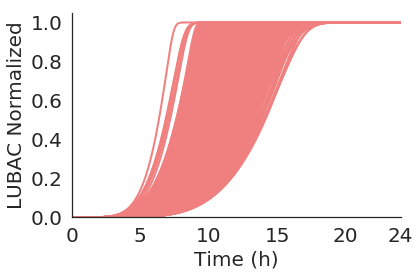

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(mode2_100)):
    plt.plot(tspan/60, m1alldf100wt2.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100wt2['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("LUBAC Normalized", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogrid.pdf')
plt.show() 

In [22]:
solverlubackdm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
lubackdm1 = solverlubackdm1.run(initials = {m.LUBAC(brip=None):7226}, param_values=mode2_100, num_processors = 20)
m1alldf100lubackd = lubackdm1.dataframe

2022-01-04 13:49:11.150 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-04 13:49:11.161 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-04 13:49:11.229 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-04 13:49:11.369 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-04 13:50:07.878 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-04 13:50:07.879 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-04 13:50:08.894 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


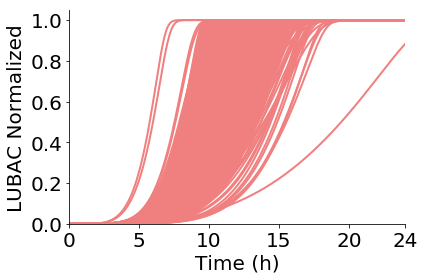

In [8]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(mode2_100)):
    plt.plot(tspan/60, m1alldf100lubackd.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100lubackd['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("LUBAC Normalized", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogrid.pdf')
plt.show() 

In [23]:
solverlubacoem1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
lubacoem1 = solverlubacoem1.run(initials = {m.LUBAC(brip=None):722600}, param_values=mode2_100, num_processors = 20)
m1alldf100lubacoe = lubacoem1.dataframe

2022-01-04 13:50:10.361 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-04 13:50:10.366 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-04 13:50:10.400 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-04 13:50:10.496 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-04 13:51:06.574 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-04 13:51:06.576 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-04 13:51:07.571 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


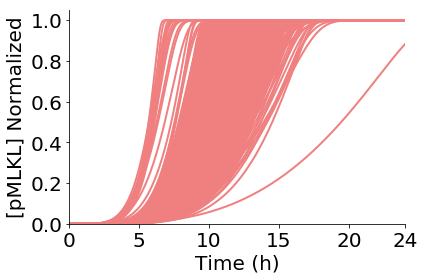

In [11]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(mode2_100)):
    plt.plot(tspan/60, m1alldf100lubacoe.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100lubacoe['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("[pMLKL] Normalized", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogrid.pdf')
plt.show() 

In [27]:
mode2 = []
clus_idxs = np.array(range(wtm12.nsims))
for idx in clus_idxs: 
    mlkl_traj = wtm12.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan/60, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode2.append(td)

In [28]:
mode2_lubacoe = []
clus_idxs = np.array(range(lubacoem1.nsims))
for idx in clus_idxs: 
    mlkl_traj = lubacoem1.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan/60, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode2_lubacoe.append(td)

In [29]:
mode2_lubackd = []
clus_idxs = np.array(range(lubackdm1.nsims))
for idx in clus_idxs: 
    mlkl_traj = lubackdm1.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan/60, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode2_lubackd.append(td)

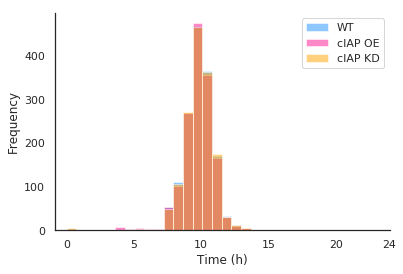

In [36]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
sns.distplot(mode2, label ='WT',color="dodgerblue", bins=25, **kwargs, kde = False)
sns.distplot(mode2_lubacoe, label = 'cIAP OE',color="deeppink", bins=25, **kwargs, kde = False)
sns.distplot(mode2_lubackd, label = 'cIAP KD',color="orange", bins=25, **kwargs, kde = False)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (h)')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
# plt.xlim(xmax = 800)
# plt.ylim(ymax = 0.04)
plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# plt.savefig('k63_necrosome_pmlkl.pdf')
plt.show()

In [24]:
df_threshtimesc2100wt = m1alldf100wt2.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100ciapoe   = m1alldf100lubacoe.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100ciapkd = m1alldf100lubackd.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [25]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'LUBAC OE': df_threshtimesc2100ciapoe['MLKLa_obs'],
                          'LUBAC KD': df_threshtimesc2100ciapkd['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'LUBAC OE','LUBAC KD'])
dfclus0n = pd.melt(dfclus0n)

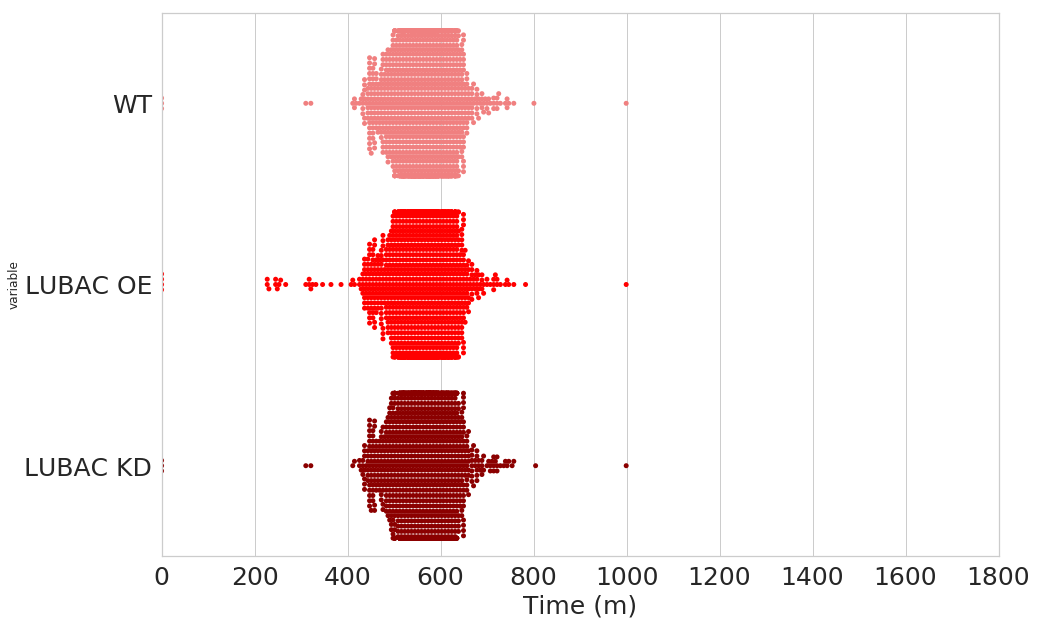

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "lightcoral", "LUBAC OE": "red", "LUBAC KD":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()